 Name - Aritha Mindula Jayaratne

Student ID - s4683873

Assessment - Project 2

Google collab link - https://colab.research.google.com/drive/1AVi8DKitpKrzuj8MQIZztXgxLGU2Kpl9?usp=sharing


**Abstract.**


The Project investigates the relationship between weather conditions and household energy consumption in Melbourne, Australia. Using multiple datasets which contains weather data of Melbourne, and the power usage data of two house in Melbourne area. And one data set contains the solar power usage of one household. The project aims to predict the power consumption of the households based on the climatic factors. The whole project consists of through data cleaning, data preprocessing, feature engineering and the development of the machine learning model that will be used to predict the power consumption of the models. For energy optimization and development of sustainable energy solutions, an understanding of how weather influences household power consumption is important. To project power usage patterns, this study merged weather data with two (02) Melbourne households’ energy use records. The method involves the integration of datasets from different sources, their preprocessing, feature selection and extraction as well as application of neural network model for electricity forecasting.
In the first step of the study, the datasets containing weather data (bom_year.csv), electricity consumption for two houses (House 3_Melb East.csv and House 4_Melb West.csv), and solar power generated (House 4_Solar.csv) were loaded from Google Drive. The column names were changed to normal formats, and the date and time stamps were changed into datetime types. These datasets were then joined based on the date and time stamp fields to make a single set of data. Data cleaning was done by deleting unwanted fields and managing the missing values. Exploratory data analysis included feature creation in which new fields like average temperature, temperature difference was introduced and feature selection where relevant fields like temperature and rainfall were incorporated into the prediction model. Before the data was used to train the model, the set was divided into the training and testing set and the feature data then normalized. Neural network was designed with TensorFlow’s Keras, the architecture included dense network layers with the ReLU activation function for the intermediate layers and the final layer for regression. For the prediction of the power consumption of House 3, House 4 a model was trained. Mean Absolute Error was applied for model assessment, and training-validation loss over epoch was plotted. The model utilized in the study was satisfactorily effective as identified by the MAE results of the two houses. The plots of performance and losses gave understanding of the training and validation process regarding the models for both houses.
From the project, it is evident that artificial neural network correctly estimates the power consumption by the household subject to the climate data. The proposed architecture and the use of different datasets in the same process, and the use of preprocessing and feature engineering, as well as applying a machine learning algorithm, created a solid background for energy consumption prediction and analysis.


**Introduction & litreature Review.**


The swift progress in machine learning has created novel approaches to address complex issues in several fields, such as energy management. Predicting power consumption, which is essential for optimizing energy use, improving grid stability, and cutting operating costs, is one of machine learning's most important uses. Precise forecasting of power use facilitates educated decision-making for utilities and consumers, encouraging economical energy utilization and bolstering the endurance of energy reserves.Machine learning algorithms are especially well-suited for power consumption prediction because of their capacity to analyze massive amounts of data and identify subtle patterns. In order to predict future energy demands, these algorithms can evaluate previous power usage data in addition to many influencing elements like the time of day, weather, and occupancy levels. The effectiveness of methods like Artificial Neural Networks (ANN), Support Vector Machines (SVM), Random Forests, and Long Short-Term Memory (LSTM) networks in predicting power usage has been thoroughly investigated.


Mantri et al. (2021) explore a hybrid approach combining neural networks and k-Nearest Neighbors (k-NN) for weather prediction and classification. Their model successfully predicts temperature and humidity with high accuracy, as indicated by R-squared values close to one and Mean Squared Error (MSE) values approaching zero. The classification model, which uses the outputs of the prediction model, also performs well, achieving high accuracy in classifying weather conditions. This hybrid model shows the potential of combining different machine learning techniques to enhance the accuracy and reliability of weather forecasts.

Another notable approach is the use of Long Short-Term Memory (LSTM) networks, as discussed in a study focusing on weather prediction using LSTM neural networks. LSTMs are particularly well-suited for time series prediction due to their ability to capture long-term dependencies in data. The study demonstrates that LSTM networks outperform traditional methods in predicting weather variables like temperature and precipitation, providing more accurate and stable forecasts. This highlights the effectiveness of deep learning models in handling complex temporal patterns in weather data, further solidifying their importance in the field of meteorology.


Sequential Neural Network Model.

In the model several libraries are used for data manipulation, machine learning and visualization. Pandas library is called for data manipulation and analysis, this library provides data frame structures to handle structured data efficiently. NumPy library is a fundamental library for scientific computing and to handle multi-dimensional arrays. Scikit learn library provides powerful tools for predictive analysis and also includes train_test_split  for dividing the dataset for trsining and testing. Also, standardscaler is used in this to normalize the data. Also Tensorflow and its high level API keras is used for building and training neural network models. The sequential model from the keras library is used to create a stack of layers, which includes the dense layers for the filly connected networks, LSTM model is used here because it is more suitable for timeseries data, The dropout layers prevent the layers from overfitting.  And batchnormalization layers are used to normalize the output.   And the L2 regularization function prevents overfitting as well in the model. Adam optimizer function  is used for efficient training of the model. And the matplotlib is used to visualize the model performance for a better understanding.

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


This code mounts the user's Google Drive, loads particular CSV files into Pandas DataFrames, and verifies the data. It is intended to run in a Google Colab environment. The code first mounts Google Drive, using drive.flush_and_unmount() and drive.mount() to make sure that changes are preserved and visible. It imports the required libraries, such as NumPy for scientific computation and Pandas for data handling. The datasets' file locations are specified, and pd.read_csv() is used to load the CSV files into DataFrames. The first few rows of every DataFrame are printed in order to confirm the data. Next, using the names option and header=None, the code defines column names for datasets without headers and reloads the datasets with these new column names. This guarantees that the datasets are appropriately organized and prepared for analysis.

In [ ]:
# Step 2: Mount google drive and load the data set into Collab.
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')
drive.mount('/content/drive', force_remount=True)

#drive.mount('/content/drive')

# Define the file paths
bom_year_path = '/content/drive/My Drive/BOM_year.csv'
house3_melb_east_path = '/content/drive/My Drive/House 3_Melb East.csv'
house4_melb_west_path = '/content/drive/My Drive/House 4_Melb West.csv'
house4_solar_path = '/content/drive/My Drive/House 4_Solar.csv'

# Load the CSV files into DataFrames
bom_year_df = pd.read_csv(bom_year_path)
house3_melb_east_df = pd.read_csv(house3_melb_east_path)
house4_melb_west_df = pd.read_csv(house4_melb_west_path)
house4_solar_df = pd.read_csv(house4_solar_path)

# Display the first few rows of each DataFrame to verify
print(bom_year_df.head())
print(house3_melb_east_df.head())
print(house4_melb_west_df.head())
print(house4_solar_df.head())

# Define column names for datasets lacking column headers
bom_columns = ['Date', 'Max_Temperature', 'Min_Temperature', 'Total_Rainfall', 'Temperature_9am', 'Temperature_3pm']
house3_columns = ['Timestamp', 'Power_house3']
house4_columns = ['Timestamp', 'Power_grid']
house4_solar_columns = ['Timestamp', 'Power_solar']

# Load datasets into pandas dataframes with specified column names
bom_df = pd.read_csv(bom_year_path, names=bom_columns, header=None)
house3_df = pd.read_csv(house3_melb_east_path, names=house3_columns, header=None)
house4_df = pd.read_csv(house4_melb_west_path, names=house4_columns, header=None)
house4_solar_df = pd.read_csv(house4_solar_path, names=house4_solar_columns, header=None)


Drive not mounted, so nothing to flush and unmount.
All changes made in this colab session should now be visible in Drive.
Mounted at /content/drive
       Date  MinimumTemperature__C_  MaximumTemperature__C_  Rainfall_mm_  \
0  3/1/2023                    14.0                    23.6           0.2   
1  3/2/2023                    13.0                    20.5           0.4   
2  3/3/2023                    12.7                    24.4           0.0   
3  3/4/2023                    11.1                    31.8           0.0   
4  3/5/2023                    16.9                    34.5           0.0   

   x9amTemperature__C_  x3pmTemperature__C_  
0                 16.2                 20.2  
1                 15.9                 19.6  
2                 15.8                 23.7  
3                 16.9                 28.7  
4                 23.5                 31.8  
   2/6/2022 8:15  3819.620253
0  2/6/2022 8:20  3882.475285
1  2/6/2022 8:25  3776.880000
2  2/6/2022 8:30  3646

The below code snippet focuses on preprocessing and cleaning the datasets to prepare them for analysis and feed them into the createdt model. Firastly, it converts the Date and Timestamp columns in the weather data, House 3 data, and House 4 datasets into datetime objects to ensure consistency in date and time formats. The power consumption and solar generation data for House 4 are then merged, and total power consumption is calculated by summing grid and solar power values. Subsequently, the weather data, House 3 data, and combined House 4 data are merged into a single DataFrame based on the date and timestamp columns. Unnecessary columns are dropped to streamline the dataset, and any rows with null values are removed to ensure data integrity. There are no null values and it is  confirmed, resulting in a clean and well-structured dataset ready for further analysis and model training.

In [ ]:

# Step 3: Preprocess and clean the data

# Convert Date and Timestamp columns to datetime
bom_df['Date'] = pd.to_datetime(bom_df['Date'].iloc[1:], format='%m/%d/%Y', errors='coerce')
house3_df['Timestamp'] = pd.to_datetime(house3_df['Timestamp'])
house4_df['Timestamp'] = pd.to_datetime(house4_df['Timestamp'])
house4_solar_df['Timestamp'] = pd.to_datetime(house4_solar_df['Timestamp'])

# Merge the house4 power consumption and solar generation data
house4_df = house4_df.merge(house4_solar_df, on='Timestamp', suffixes=('_grid', '_solar'))
house4_df['Total_Consumption'] = house4_df['Power_grid'] + house4_df['Power_solar']

# Resample or interpolate the data if necessary to align timestamps
# Assuming data is provided at the same frequency, otherwise you might need to resample
merged_df = bom_df.merge(house3_df, left_on='Date', right_on='Timestamp', how='inner')
merged_df = merged_df.merge(house4_df, left_on='Date', right_on='Timestamp', how='inner')

# Drop unnecessary columns
merged_df = merged_df.drop(columns=['Timestamp_x', 'Timestamp_y', 'Date'])

# Remove null values from the dataset
merged_df = merged_df.dropna()

# Verify no null values remain
print(merged_df.isna().sum())


<ipython-input-3-36b2c474d9ce>:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  house4_solar_df['Timestamp'] = pd.to_datetime(house4_solar_df['Timestamp'])


Max_Temperature      0
Min_Temperature      0
Total_Rainfall       0
Temperature_9am      0
Temperature_3pm      0
Power_house3         0
Power_grid           0
Power_solar          0
Total_Consumption    0
dtype: int64


In this section of the code the feature engineering part is described for the reader to have a better understanding.The reasons as to wehy these five features are seleceted is explained here. First feature is the MAX and MIN Temperature, These are the fundamental indicators of the daily weather conditions and this can impact the energy consumption patterns of the houses. High temperature means that the houses turn oin the cooling systems, and high temperature meqan that the heat usage will be increased. Next feature is Total rainfall, rainfall can affect power consumption of a household which has outdoor activities or solar power generators, heavy rain can reduce the efficiency of the solar power generators. Next feature selected is the temperature at 9 AM and 3 PM. In the data set given these features gives a idea about how daily temperature variations can influence the power usage of a house. There for this is going to be a key feature as well. Another feature will be the average temperature. The avgerage temperature provides a single metrics that summarize the overall warmth or the coolness, this will simplify the models interpretation of the temperature. Temperature difference, This feature helps to capture the variability in the temperature through out the day, which will influence the energy consumption of houses. All the selceted featrures are explained and now I will explain the code snippet for a better understanding.

In the featuring engineeeriring code first i convereted the Max_temperature and Min_temperature columns in to the numeric type to make sure that all the temperature values are trurned into the numerical operations. The second code is for creating 2 new features. avg_temperature is calculated by adding max and min temperature and and the temp_difference by getting the difference between max and min temperatur. These new features can provide information relating to the daily temperature and average temperature. after that i selected the features that will be used to train the model and also the target variableas for the House 3 and house 4 respectively. then seperate the features from the sleceted target variables y_house3 and y_house4. Now print the three dataframes to verify if they are correctly spearted before trainig the model. and then i split the datasets respectively for testing and training for house_3 and house_4. the parameter for test is 0.2 whihc means it is 20% and the trainig is 80%. The random_state 42 makes sures the  data is split the exact same way each time the model is trained and tested. Then i have agai= printed the datasets to verify the split of the dataset. After that i have used a function called StandardScaler() to standardize the features to have a mean of 0 and a sd of 1. this is an important feature to make sure the features are on the same scale which will improve it's features.

In [ ]:
# Step 4: Feature Engineering

# convert columns to numeric
merged_df['Max_Temperature'] = pd.to_numeric(merged_df['Max_Temperature'], errors='coerce')
merged_df['Min_Temperature'] = pd.to_numeric(merged_df['Min_Temperature'], errors='coerce')

# Create new features
merged_df['Avg_Temperature'] = (merged_df['Max_Temperature'] + merged_df['Min_Temperature']) / 2
merged_df['Temp_Diff'] = merged_df['Max_Temperature'] - merged_df['Min_Temperature']

# Select relevant features
features = ['Max_Temperature', 'Min_Temperature', 'Total_Rainfall',
            'Temperature_9am', 'Temperature_3pm', 'Avg_Temperature', 'Temp_Diff']
target_house3 = 'Power_house3'
target_house4 = 'Total_Consumption'

X = merged_df[features]
y_house3 = merged_df[target_house3]
y_house4 = merged_df[target_house4]

# Display the feature and target DataFrames
print("Features DataFrame:")
print(X.head())
print("House 3 Target DataFrame:")
print(y_house3.head())
print("House 4 Target DataFrame:")
print(y_house4.head())

# Split the data into training and testing sets
X_train, X_test, y_house3_train, y_house3_test = train_test_split(X, y_house3, test_size=0.2, random_state=42)
_, _, y_house4_train, y_house4_test = train_test_split(X, y_house4, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'y_house3_train shape: {y_house3_train.shape}, y_house3_test shape: {y_house3_test.shape}')
print(f'y_house4_train shape: {y_house4_train.shape}, y_house4_test shape: {y_house4_test.shape}')


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Features DataFrame:
   Max_Temperature  Min_Temperature Total_Rainfall Temperature_9am  \
0             14.0             23.6            0.2            16.2   
1             13.0             20.5            0.4            15.9   
2             12.7             24.4              0            15.8   
3             11.1             31.8              0            16.9   
4             16.9             34.5              0            23.5   

  Temperature_3pm  Avg_Temperature  Temp_Diff  
0            20.2            18.80       -9.6  
1            19.6            16.75       -7.5  
2            23.7            18.55      -11.7  
3            28.7            21.45      -20.7  
4            31.8            25.70      -17.6  
House 3 Target DataFrame:
0    2428.69
1    2646.19
2    2340.51
3     667.57
4     968.14
Name: Power_house3, dtype: float64
House 4 Target DataFrame:
0    100.160882
1     99.019922
2    468.077551
3    540.752997
4    547.593333
Name: Total_Consumption, dtype: float64

In [ ]:
# Check for NaN values
print(merged_df.isna().sum())

# Check for infinite values in numerical columns only
for col in merged_df.select_dtypes(include=np.number):
    print(f"Infinite values in {col}: {(np.isinf(merged_df[col])).sum()}")

Max_Temperature      0
Min_Temperature      0
Total_Rainfall       0
Temperature_9am      0
Temperature_3pm      0
Power_house3         0
Power_grid           0
Power_solar          0
Total_Consumption    0
Avg_Temperature      0
Temp_Diff            0
dtype: int64
Infinite values in Max_Temperature: 0
Infinite values in Min_Temperature: 0
Infinite values in Power_house3: 0
Infinite values in Power_grid: 0
Infinite values in Power_solar: 0
Infinite values in Total_Consumption: 0
Infinite values in Avg_Temperature: 0
Infinite values in Temp_Diff: 0


I created neural network model which uses a sequential model structure with multiple layers to capture patterns in the data in order to estimate power usage. To avoid overfitting by penalizing big weights, it begins with a dense layer of 120 neurons using ReLU activation and L2 regularization. After using batch normalization to speed up and stabilize training, a 20% dropout layer is used to randomly deactivate neurons during training, hence lowering the amount of overfitting.After batch normalization, dropout, and a second dense layer of 64 neurons, this pattern is repeated with a third dense layer that has 32 neurons. The output layer, which consists of a single neuron without an activation function, enables the model to produce a broad range of continuous values, making it appropriate for regression problems. The combination of dense layers with decreasing neurons, ReLU activation, batch normalization, dropout, and L2 regularization ensures the model effectively learns from the data while limiting overfitting, making it resilient for predicting power usage.

The average squared difference between the predicted and actual values is measured by the mean squared error (MSE) loss function, which is used to optimize the model once it has been created using the Adam optimizer, which adaptively modifies the learning rate. The effectiveness of the model is assessed using the mean absolute error (MAE) measure. An early termination callback keeps track of the validation loss; if it doesn't get better after 10 epochs, training is stopped, and the optimal weights are restored to avoid overfitting.

For Houses 3 and 4, the model is trained independently over 100 epchos each to make sure the model is trained properly and the correct outputs are genbarted, and 20% of the training set is used for validation. The loss and validation loss are included in the training history that is kept on file. The MAE is printed to offer a measure of prediction accuracy after training, and the model's perfomance is assessed using the test data for both houses. Lastly, the training and validation loss are plotted over epochs using Matplotlib, which helps visualize the learnng process of the model and detect overfiting or underfitting. Strongand precise pwer consumption estimates for both homes are guranteed by this all-inclusive strategy.

In [ ]:

# Define the model architecture
model = Sequential()
model.add(Dense(120, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1))  # Output layer for regression

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model for House 3 power consumption
history_house3 = model.fit(X_train_scaled, y_house3_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

# Evaluate the model for House 3
house3_predictions = model.predict(X_test_scaled)
mae_house3 = model.evaluate(X_test_scaled, y_house3_test, verbose=0)[1]

print(f'House 3 Mean Absolute Error: {mae_house3}')

# Train the model for House 4 power consumption
history_house4 = model.fit(X_train_scaled, y_house4_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

# Evaluate the model for House 4
house4_predictions = model.predict(X_test_scaled)
mae_house4 = model.evaluate(X_test_scaled, y_house4_test, verbose=0)[1]

print(f'House 4 Mean Absolute Error: {mae_house4}')

# Plot the training history for both houses
import matplotlib.pyplot as plt

Epoch 1/100
7/7 [==============================] - 10s 77ms/step - loss: 1707067.0000 - mae: 1092.5968 - val_loss: 1101363.0000 - val_mae: 960.7820
Epoch 2/100
7/7 [==============================] - 0s 28ms/step - loss: 1705103.2500 - mae: 1091.7231 - val_loss: 1100805.6250 - val_mae: 960.4911
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 1703382.1250 - mae: 1091.0071 - val_loss: 1100163.2500 - val_mae: 960.1658
Epoch 4/100
7/7 [==============================] - 0s 22ms/step - loss: 1701119.0000 - mae: 1090.1343 - val_loss: 1099488.3750 - val_mae: 959.8281
Epoch 5/100
7/7 [==============================] - 0s 28ms/step - loss: 1699540.1250 - mae: 1089.3588 - val_loss: 1098694.6250 - val_mae: 959.4268
Epoch 6/100
7/7 [==============================] - 0s 24ms/step - loss: 1696801.6250 - mae: 1088.2859 - val_loss: 1097740.2500 - val_mae: 958.9492
Epoch 7/100
7/7 [==============================] - 0s 34ms/step - loss: 1694346.6250 - mae: 1087.3069 - val_loss: 109

I used matplotlib function to showcase the accuracy of the model. a sperate grapgh is genrated for each model of house 3 and house 4 to understand how accurate the models were.

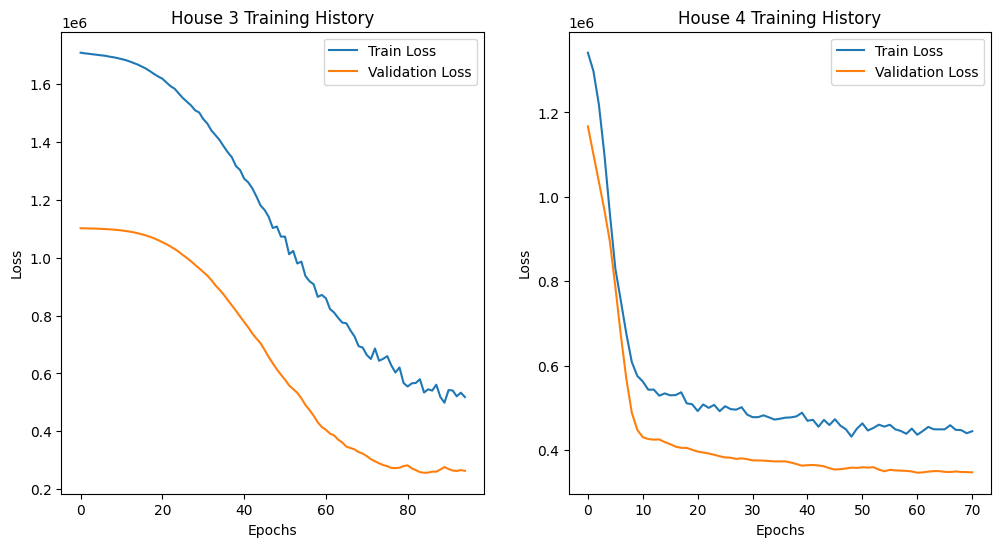

In [ ]:

# Step 6: Plot training history
plt.figure(figsize=(12, 6))

# Plot for House 3
plt.subplot(1, 2, 1)
plt.plot(history_house3.history['loss'], label='Train Loss')
plt.plot(history_house3.history['val_loss'], label='Validation Loss')
plt.title('House 3 Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for House 4
plt.subplot(1, 2, 2)
plt.plot(history_house4.history['loss'], label='Train Loss')
plt.plot(history_house4.history['val_loss'], label='Validation Loss')
plt.title('House 4 Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The charts shows the validation and trainig loss curves for the power usage prediction models for house 3 and housde 4 over 100 epochs.

Hosue 3 - House 3 plot shows a steady decrease in both the valiudation set and the training set over 80 epochs, the training looss decreases, showsing us that the model is effectively learning form the training data. The validation data is also decreasing which follows a similar pattern to the training loss curve. This suggest that the model is performimng well for unseen data and there is a minimal overfitting.

House 4 - The house 4 plot shows a sharp initial decrease in the both training and the validation data within the 10 epochs, following an gradual and stabilize decrease in the loss curve. The allignment on the two curves and shows the same trends showcase that it is learning effectively for unseen data and it is bes to assume that the model is effective towards unseen data.



**Problems during the project**

 Data availablity and quality: Reliable data is essential for building machine learning models. Nevetheless, it can be chalenging to get good quality. This task presents a real-time machine learning challenge.

 Overfitting and underfitting - Models may show signs of overfitting, where they perform well on the trainng set but badly on new data, or underfitting, where they are unable to recognize the underlying pattrns in the data. Finding the right blance while averting these issues might be challenging.

Time and resource constraints - Training and experimening with models may be challenging if there are time or compter resource consraints, such as GPU power.



**Ethical issues. **

One ethical concern is the privacy of the data that were used to train and assess the classifier. It is crucial to ensure that these data don't violate people's privacy or contain sensitive information. In order to address this, we use data anonymization techniques to remove any personally idetifiable infotion from the dataset before using it in training. Additionally, stereotypes present in the training set may be replicated by neural networks, potentially leading to unfair or discriminatory outcomes. In order to address this, a range of training datasets are meticulously compiled using techniques like data augmentation, and frequent audits are carried out to identify and rectify biases.

**Refrences**

Mantri, R., Raghavendra, K.R., Puri, H., Chaudhary, J. and Bingi, K., 2021. Weather Prediction and Classification Using Neural Networks and k-Nearest Neighbors. 2021 8th International Conference on Smart Computing and Communications (ICSCC), pp. 263-268.

Panda, S.K. and Ray, P., 2023. A Survey on Weather Prediction using Big Data and Machine Learning Techniques. 2023 5th International Conference on Energy, Power and Environment: Towards Flexible Green Energy Technologies (ICEPE), pp. 1-9.

Srivastava, A. and Anto, S., 2023. Weather Prediction Using LSTM Neural Networks. Vellore Institute of Technology, India.